<a href="https://colab.research.google.com/github/adiknur007/ML/blob/main/%D0%9D%D2%B1%D1%80%D1%82%D0%B0%D0%B5%D0%B2_%D3%98%D0%B4%D1%96%D0%BB%D0%B5%D1%8215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# СӨЖ
# Сверткалық Нейрондық Желілер (CNN) және CIFAR-10

**Мақсаты:** Сверткалық нейрондық желілердің (CNN) жұмыс істеу принципін түсіну және CIFAR-10 деректер жиынтығындағы түрлі-түсті суреттерді классификациялау үшін модель құру.

**Сіздің тапсырмаңыз:** Төмендегі код ұяшықтарында `# TODO` деп белгіленген жерлерді дұрыс кодпен немесе мәнмен толтыру.




### 1. Қысқаша теория

Сверткалық нейрондық желілер (CNN) – бұл суреттерді өңдеуге арналған ең тиімді архитектура. Ол негізгі үш бөліктен тұрады:

1. **Convolutional Layer (Сверткалық қабат):** Суреттің үстінен кішкентай "сүзгілер" (filters) жүргізу арқылы маңызды белгілерді (сызықтар, бұрыштар, фактуралар) бөліп алады.
* *Функция:* `layers.Conv2D`


2. **Pooling Layer (Пулинг қабаты):** Суреттің өлшемін кішірейтеді, есептеуді жеңілдетеді және маңызды ақпаратты қалдырады. Ең көп тарағаны – Max Pooling (аймақтағы ең үлкен мәнді алу).
* *Функция:* `layers.MaxPooling2D`


3. **Fully Connected Layer (Толық байланысқан қабат):** Соңында табылған белгілерді біріктіріп, суреттің қай класқа жататынын анықтайды.
* *Функция:* `layers.Dense`



Алдымен қажетті кітапханаларды қосайық.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Нұсқаны тексеру
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0



### 2. Деректерді жүктеу (CIFAR-10)

Біз **CIFAR-10** датасетін қолданамыз. Онда 10 түрлі класқа жататын 60,000 түрлі-түсті сурет (32x32 пиксель) бар.
Кластар: *'ұшақ', 'автокөлік', 'құс', 'мысық', 'бұғы', 'ит', 'бақа', 'жылқы', 'кеме', 'жүк көлігі'.*


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


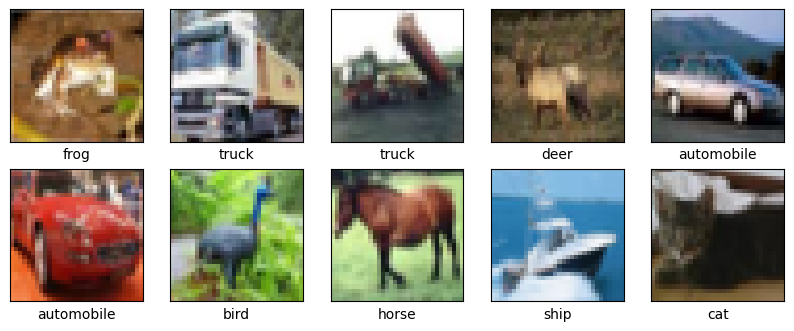

In [ ]:
# Деректерді жүктеу
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Пиксель мәндерін 0 мен 1 аралығына келтіру (Нормализация)
# TODO: Студент сурет пиксельдерін нормализациялауы керек (255.0-ге бөлу)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Класс атаулары
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Деректердің дұрыс жүктелгенін тексеру (алғашқы 10 суретті шығару)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # CIFAR labels массивтер массиві болып табылады, сондықтан қосымша индекс керек
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


### 3. CNN Архитектурасын құру (Негізгі тапсырма)

Бұл бөлімде сіз нейрондық желінің "қаңқасын" жинайсыз.
Сызба мынадай болуы керек:

1. **Conv2D:** 32 фильтр, (3, 3) өлшем, 'relu' активациясы, кіріс өлшемі (32, 32, 3).
2. **MaxPooling2D:** (2, 2) өлшемі.
3. **Conv2D:** 64 фильтр, (3, 3) өлшем, 'relu' активациясы.
4. **MaxPooling2D:** (2, 2) өлшемі.
5. **Conv2D:** 64 фильтр, (3, 3) өлшем, 'relu' активациясы.
6. **Flatten:** Векторға айналдыру.
7. **Dense:** 64 нейрон, 'relu' активациясы.
8. **Dense (Шығыс):** 10 нейрон (кластар саны).

**Тапсырма:** Төмендегі кодта қалдырылған `# TODO` орындарын толтырыңыз.


In [ ]:
model = models.Sequential()

# --- Feature Extraction (Белгілерді алу) бөлігі ---

# 1-қабат: Конволюция
# TODO: filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3) параметрлерін қосыңыз
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3,3)
    activation='relu',
    input_shape=(32, 32, 3)
))
    # TODO: Кодты осы жерге жазыңыз ))

# 2-қабат: Пулинг
# TODO: pool_size=(2, 2) параметрін қосыңыз
model.add(layers.MaxPooling2D(
    # TODO: Кодты осы жерге жазыңыз ))



# 3-қабат: Конволюция (фильтр санын 64-ке көбейтіңіз)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 4-қабат: Пулинг
model.add(layers.MaxPooling2D((2, 2)))

# 5-қабат: Конволюция (64 фильтр)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification (Жіктеу) бөлігі

# 6-қабат: Flatten (Жалпақтау - 3D тензорды 1D векторға айналдыру)
model.add(layers.Flatten())

# 7-қабат: Dense (Толық байланысқан қабат)
# TODO: 64 нейрон және 'relu' активациясын қолданыңыз
model.add(layers.Dense( # TODO: Кодты осы жерге жазыңыз ))

# 8-қабат: Шығыс қабаты
# TODO: CIFAR-10 датасетінде қанша класс бар? Соған сәйкес нейрон санын жазыңыз.
model.add(layers.Dense( # TODO: Нейрон саны ))

# Модель құрылымын тексеру
model.summary()

In [ ]:
model = models.Sequential()

# --- Feature Extraction (Белгілерді алу) бөлігі ---

# 1-қабат: Конволюция
# TODO: filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3) параметрлерін қосыңыз
model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
    input_shape=(32, 32, 3)
))
    # TODO: Кодты осы жерге жазыңыз ))

# 2-қабат: Пулинг
# TODO: pool_size=(2, 2) параметрін қосыңыз
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # TODO: Кодты осы жерге жазыңыз ))



# 3-қабат: Конволюция (фильтр санын 64-ке көбейтіңіз)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 4-қабат: Пулинг
model.add(layers.MaxPooling2D((2, 2)))

# 5-қабат: Конволюция (64 фильтр)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification (Жіктеу) бөлігі

# 6-қабат: Flatten (Жалпақтау - 3D тензорды 1D векторға айналдыру)
model.add(layers.Flatten())

# 7-қабат: Dense (Толық байланысқан қабат)
# TODO: 64 нейрон және 'relu' активациясын қолданыңыз
model.add(layers.Dense(64, activation='relu')) # TODO: Кодты осы жерге жазыңыз ))

# 8-қабат: Шығыс қабаты
# TODO: CIFAR-10 датасетінде қанша класс бар? Соған сәйкес нейрон санын жазыңыз.
model.add(layers.Dense(10)) # TODO: Нейрон саны ))

# Модель құрылымын тексеру
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


### 4. Модельді компиляциялау және оқыту

Модель дайын, енді оны оқыту ережелерін бекітуіміз керек.

* **Optimizer:** `adam` (ең танымал оптимизатор).
* **Loss Function:** `SparseCategoricalCrossentropy` (кластар сандармен берілген кезде қолданылады).
* **Metrics:** `accuracy` (дәлдік).

**Тапсырма:** Компиляция және оқыту параметрлерін толтырыңыз.


In [ ]:
# Модельді компиляциялау
# TODO: optimizer='adam' деп көрсетіңіз
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Модельді оқыту (Training)
# TODO: epochs=10 (оқыту циклінің саны) деп көрсетіңіз
# validation_data ретінде (test_images, test_labels) қолданыңыз
history = model.fit(train_images, train_labels,
                    epochs= 10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3614 - loss: 1.7279 - val_accuracy: 0.5686 - val_loss: 1.2035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5850 - loss: 1.1652 - val_accuracy: 0.6233 - val_loss: 1.0530
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6537 - loss: 0.9890 - val_accuracy: 0.6702 - val_loss: 0.9565
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6911 - loss: 0.8857 - val_accuracy: 0.6709 - val_loss: 0.9505
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7170 - loss: 0.8048 - val_accuracy: 0.6979 - val_loss: 0.8728
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7376 - loss: 0.7434 - val_accuracy: 0.7035 - val_loss: 0.8601
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7536 - loss: 0.6946 - val_accuracy: 0.6910 - val_loss: 0.9173
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7714 - loss: 0.6553 -



### 5. Нәтижелерді бағалау

Модельдің оқу барысында қателіктер қалай азайғанын және дәлдік қалай өскенін график арқылы көрейік.


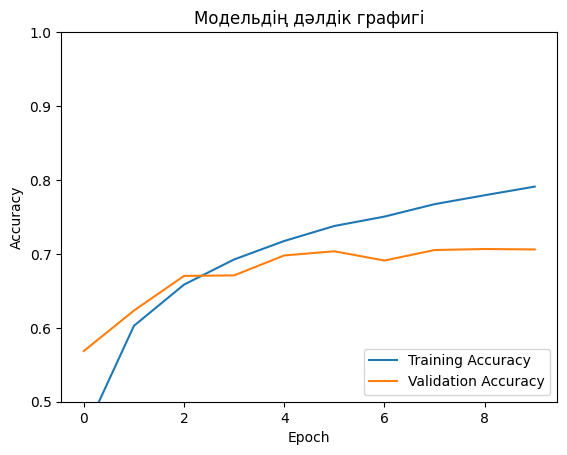

313/313 - 1s - 2ms/step - accuracy: 0.7060 - loss: 0.8909

Модельдің тесттегі дәлдігі: 70.60%


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Модельдің дәлдік графигі')
plt.show()

# Тест жиынтығындағы соңғы дәлдікті есептеу
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nМодельдің тесттегі дәлдігі: {test_acc*100:.2f}%")


### 6. Модельді тексеру (Prediction)

Енді моделіміз нақты суретті қалай танитынын тексерейік. Біз тест жиынтығынан кездейсоқ бір суретті алып, модельге ұсынамыз.


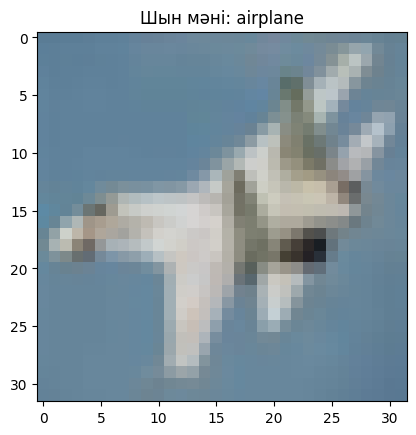

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Бұл сурет 58.43% ықтималдықпен 'deer' деп танылды.


In [ ]:
# Тест жиынтығынан 10-шы суретті алайық
n = 10

plt.imshow(test_images[n])
plt.title(f"Шын мәні: {class_names[test_labels[n][0]]}")
plt.show()

# Болжам жасау
# Суретті (32,32,3) пішінінен (1, 32, 32, 3) пішініне ауыстыру керек (batch өлшемі)
img_array = np.expand_dims(test_images[n], axis=0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"Бұл сурет {100 * np.max(score):.2f}% ықтималдықпен '{class_names[np.argmax(score)]}' деп танылды.")



### Қорытынды сұрақтар

Зертханалық жұмысты қорғау үшін келесі сұрақтарға жауап дайындаңыз:

1. Неліктен біз `Conv2D` қабатын қолданамыз, жай ғана `Dense` қабаттары жеткіліксіз бе?
2. `MaxPooling` қабаты суреттің өлшемін қалай өзгертеді және оның пайдасы неде?
3. Егер `epochs` санын 10-нан 50-ге дейін көбейтсек, нәтиже қалай өзгеруі мүмкін? (Overfitting туралы ойланыңыз).

# Нәтиже дәлдік 90+